# Linear Regression (Single Variable)

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dhaka Rent.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [4]:
df.shape

(60, 2)

In [5]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [6]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,60.0,2289.000000,538.880509,1200.0,1900.0,2130.0,2700.0,3500.0
rent,60.0,37269.166667,11770.736234,20000.0,31000.0,34450.0,47625.0,70500.0


In [8]:
df['rent'].head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [9]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

Text(0.5, 1.0, 'Dhaka Rent Analysis')

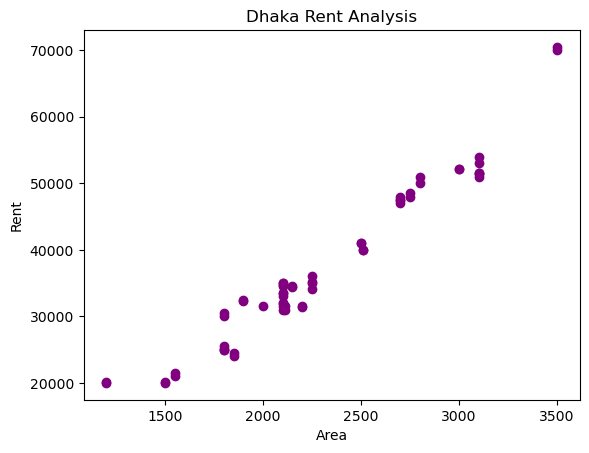

In [10]:
#import matplotlib.pyplot as plt

plt.scatter(df['area'],df['rent'],color='purple')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')


## Regression Analysis using sklearn

In [11]:
#from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [12]:
reg.fit(df[['area']],df[['rent']])

LinearRegression()

**Caution:** 
1. Here df[['area']] is a Dataframe with single column** but df['area'] is a series.
2. For fit the regression variable X must be 2D but Y may be 1D or 2D, so reg.fit(df[['rent']], df['area']) give same result but reg.fit(df['rent'], df['area']) doesn't fit.

In [13]:
M = reg.coef_
M

array([[21.29266147]])

In [14]:
C = reg.intercept_
C

array([-11469.73544643])

In [15]:
#prediction rent for area 2000
reg.predict([[2000]])

array([[31115.58750079]])

In [16]:
#Predicted rent(Y)
reg.predict(df[['area']]) #the output is a array not dataframe

array([[31115.58750079],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],
       [34309.48672183],
       [33244.85364815],
       [33244.85364815],
       [41974.84485233],
       [36438.7528692 ],
       [54537.51512177],
       [26857.05520607],
       [21533.88983767],
       [26857.05520607],
       [46020.45053232],
       [33457.78026289],
       [33244.85364815],
       [63054.57971121],
       [14081.4583219 ],
       [48149.71667968],
       [54537.51512177],
       [47085.083606  ],
       [26857.05520607],
       [35374.11979552],
       [54537.51512177],
       [33244.85364815],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],


#### Input a column of predicted Y into the DataFrame

In [17]:
df['predicted_rent'] = reg.predict(df[['area']])
df.head()

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


#### Measure Mean Absolute Error (MAE)

In [18]:
#from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(df['rent'], df['predicted_rent'])
MAE

2009.8695093576282

#### Measure Mean Squared Error (MSE)

In [19]:
#from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df['rent'], df['predicted_rent'])
MSE

6778077.204095561

#### Measure RMSE

In [20]:
#import math
RMSE = math.sqrt(MSE)
RMSE

2603.474064417689

### Visualization of Model

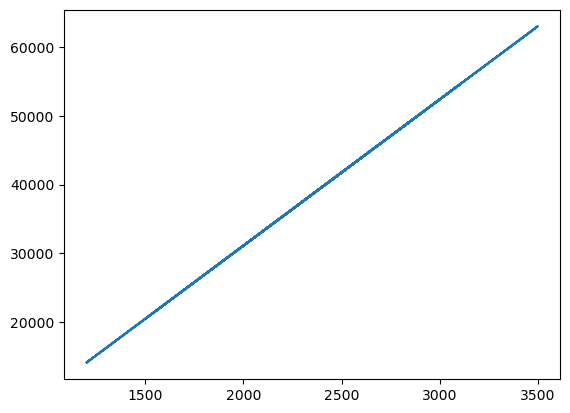

In [21]:
#BEST FIT LINE
#plt.plot(x, reg.predict(y))
#from matplotlib import pyplot as plt

plt.plot(df['area'], df['predicted_rent'])

Text(0.5, 1.0, 'Dhaka Rent Analysis')

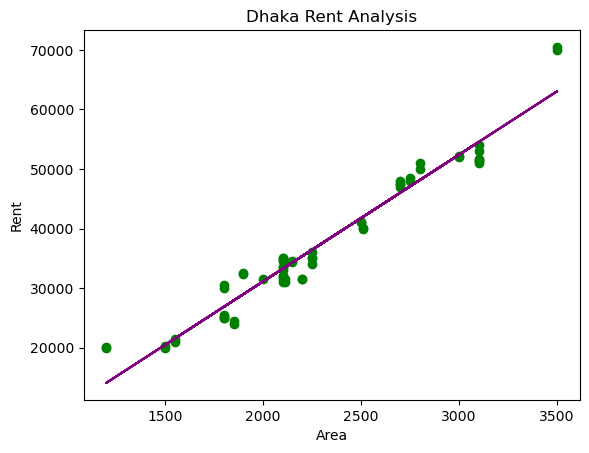

In [22]:
plt.plot(df['area'], df['predicted_rent'],color='purple')
plt.scatter(df['area'], df['rent'], color = 'green')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

# Regression Analysis Manually in Python

In [23]:
df2 = pd.read_csv('Dhaka Rent.csv')
df2.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [24]:
x = df2['area']
y = df2['rent']

In [25]:
import numpy as np
mean_x = np.mean(x)
mean_y = np.mean(y)

In [26]:
mean_x

2289.0

In [27]:
mean_y

37269.166666666664

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [28]:
coefficient_m = np.sum((x-mean_x)*(y-mean_y))/np.sum((x-mean_x)**2)
coefficient_m

21.292661473611954

In [29]:
intercept_c = mean_y - coefficient_m*mean_x
intercept_c

-11469.7354464311

In [30]:
pred_y = (coefficient_m * x) + intercept_c
pred_y.head()

0    31115.587501
1    33244.853648
2    41761.918238
3    36438.752869
4    52408.248974
Name: area, dtype: float64

In [31]:
df2['predicted_y'] = pred_y
df2.head()

,area,rent,predicted_y
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [32]:
residuals = y - pred_y
residuals.head()

0     384.412499
1    1755.146352
2    -711.918238
3    -338.752869
4    -308.248974
dtype: float64

In [33]:
df2['residuals'] = y - pred_y

df2.head()

,area,rent,predicted_y,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


In [34]:
df2['abs_residual'] = abs(y - pred_y)

df2.head()

,area,rent,predicted_y,residuals,abs_residual
0,2000,31500,31115.587501,384.412499,384.412499
1,2100,35000,33244.853648,1755.146352,1755.146352
2,2500,41050,41761.918238,-711.918238,711.918238
3,2250,36100,36438.752869,-338.752869,338.752869
4,3000,52100,52408.248974,-308.248974,308.248974


#### Measure MAE, MSE & RMSE

In [35]:
MAE = np.mean(abs(y-pred_y))
MAE

2009.8695093576268

In [36]:
MAE = np.mean(df2['abs_residual'])
MAE

2009.8695093576268

In [37]:
MSE = np.mean((y-pred_y)**2)
MSE

6778077.204095553

In [38]:
RMSE = math.sqrt(MSE)
RMSE

2603.4740644176873